###  Etude sur Introduction aux réseaux de neurones artificiels 2 - classification

### train

### 1 - Importation des librairies Python nécessaires à la résolution du problème

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle as pkl
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

In [2]:
pd.set_option("max_columns", None)
pd.set_option("max_colwidth", None)
pd.set_option("max_row", 500)

### 2 - Chargement des données train

J'ai testé les données avec StandardScaler et celles avec MinMaxScaler et j'ai meilleur resultat avec StandardScaler.

In [3]:
X_train = joblib.load("X_train.joblib")

In [4]:
y_train = joblib.load("y_train.joblib")

In [5]:
X_test = joblib.load("X_test.joblib")

In [6]:
y_test = joblib.load("y_test.joblib")

### 3 - gridsearch

In [7]:
MLPC = MLPClassifier()

In [8]:
hyper_param_grid=[{'hidden_layer_sizes':np.arange(2,30).tolist(),
                   'activation':['relu','logistic','tanh'],
                   'solver':['lbfgs'], 
                   'alpha':[0.0001], 
                   'max_iter':[10000], 
                   'random_state':[0], 
                   'max_fun':[15000],
                      'random_state':[42]}] 

In [9]:
grid_search = GridSearchCV(
    estimator = MLPC, 
    param_grid = hyper_param_grid,    
    cv=3,
    return_train_score=True,
    n_jobs=-1,
    verbose=2)

In [10]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 84 candidates, totalling 252 fits


GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid=[{'activation': ['relu', 'logistic', 'tanh'],
                          'alpha': [0.0001],
                          'hidden_layer_sizes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                                 12, 13, 14, 15, 16, 17, 18, 19,
                                                 20, 21, 22, 23, 24, 25, 26, 27,
                                                 28, 29],
                          'max_fun': [15000], 'max_iter': [10000],
                          'random_state': [42], 'solver': ['lbfgs']}],
             return_train_score=True, verbose=2)

In [11]:
results=pd.DataFrame(grid_search.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83
mean_fit_time,0.056418,0.022855,0.020189,0.017489,0.020845,0.020163,0.020175,0.016128,0.01412,0.023546,0.013442,0.014808,0.019485,0.01749,0.016121,0.016135,0.019496,0.019502,0.011443,0.023534,0.019499,0.016806,0.017493,0.023543,0.016808,0.030264,0.022901,0.020174,0.026944,0.026899,0.027565,0.020177,0.016803,0.019543,0.016813,0.023529,0.021532,0.019495,0.01749,0.014812,0.020173,0.022857,0.019496,0.020168,0.020175,0.018166,0.026209,0.020222,0.020526,0.021527,0.02225,0.020853,0.023585,0.023539,0.027263,0.024559,0.030253,0.023526,0.033608,0.026891,0.019484,0.020165,0.014126,0.017483,0.016816,0.020171,0.015452,0.020166,0.016127,0.017489,0.017505,0.019489,0.026913,0.020845,0.026219,0.018179,0.025534,0.02085,0.021545,0.025555,0.021546,0.023536,0.029567,0.023519
std_fit_time,0.005741,0.005323,0.000016,0.003787,0.000961,0.006561,0.0,0.004359,0.004357,0.004754,0.004765,0.005304,0.007418,0.003802,0.004354,0.004352,0.000965,0.000971,0.000963,0.004758,0.000971,0.003427,0.003798,0.010949,0.003412,0.000001,0.003857,0.000009,0.00469,0.009506,0.023295,0.001661,0.003418,0.008281,0.004759,0.009503,0.008289,0.000959,0.00379,0.00379,0.000006,0.012787,0.000956,0.000003,0.000009,0.004359,0.00435,0.000076,0.001263,0.000967,0.002215,0.000959,0.004712,0.004763,0.002907,0.003324,0.014263,0.004751,0.012574,0.00951,0.007417,0.000006,0.004356,0.003797,0.004757,0.000002,0.003793,0.000001,0.004351,0.003791,0.00376,0.007423,0.004758,0.007416,0.004368,0.004342,0.003803,0.000961,0.007426,0.003796,0.000965,0.00477,0.000963,0.003411
mean_score_time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002683,0.002683,0.0,0.0,0.000682,0.00068,0.0,0.0,0.005367,0.0,0.0,0.007406,0.0,0.00336,0.003369,0.0,0.0,0.0,0.0,0.0,0.002679,0.0,0.0,0.0,0.0,0.0,0.0,0.00068,0.0,0.0,0.0,0.003358,0.0,0.0,0.0,0.002684,0.00068,0.002682,0.0,0.0,0.000333,0.0,0.000679,0.0,0.001012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002681,0.003355,0.0,0.000679,0.0,0.0,0.0,0.0,0.0,0.003357,0.0,0.00269,0.00268,0.001373,0.00268,0.002681,0.001362,0.0,0.0,0.0,0.000681
std_score_time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003795,0.003795,0.0,0.0,0.000964,0.000961,0.0,0.0,0.003795,0.0,0.0,0.009059,0.0,0.003412,0.003423,0.0,0.0,0.0,0.0,0.0,0.003789,0.0,0.0,0.0,0.0,0.0,0.0,0.000962,0.0,0.0,0.0,0.003414,0.0,0.0,0.0,0.003796,0.000962,0.003793,0.0,0.0,0.00047,0.0,0.00096,0.0,0.000832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003792,0.00341,0.0,0.000961,0.0,0.0,0.0,0.0,0.0,0.003408,0.0,0.003804,0.00379,0.000971,0.00379,0.003791,0.000963,0.0,0.0,0.0,0.000963
param_activation,relu,relu,relu,relu,relu,relu,relu,relu,relu,relu,relu,relu,relu,relu,relu,relu,relu,relu,relu,relu,relu,relu,relu,relu,relu,relu,relu,relu,logistic,logistic,logistic,logistic,logistic,logistic,logistic,logistic,logistic,logistic,logistic,logistic,logistic,logistic,logistic,logistic,logistic,logistic,logistic,logistic,logistic,logistic,logistic,logistic,logistic,logistic,logistic,logistic,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh,tanh
param_alpha,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
param_hidden_layer_sizes,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,2,3,4,5,6,7,8,

In [12]:
results=pd.DataFrame(grid_search.cv_results_)
result = results.copy()
test = result[['mean_train_score','mean_test_score']]
m1= test['mean_train_score']
m2= test['mean_test_score']
error = result['mean_train_score']-result['mean_test_score']
result['error'] = error
xlabel=result['param_activation'].str.cat(result['param_hidden_layer_sizes'].astype(str))
result['xlabel'] = xlabel
result[['param_activation','param_hidden_layer_sizes','mean_train_score','mean_test_score','error']]

,param_activation,param_hidden_layer_sizes,mean_train_score,mean_test_score,error
0,relu,2,0.994507,0.960410,0.034097
1,relu,3,1.000000,0.955995,0.044005
2,relu,4,1.000000,0.955995,0.044005
3,relu,5,1.000000,0.955981,0.044019
4,relu,6,1.000000,0.955966,0.044034
5,relu,7,1.000000,0.960396,0.039604
6,relu,8,1.000000,0.962589,0.037411
7,relu,9,1.000000,0.940601,0.059399
8,relu,10,0.998900,0.949358,0.049542
9,relu,11,1.000000,0.956010,0.043990


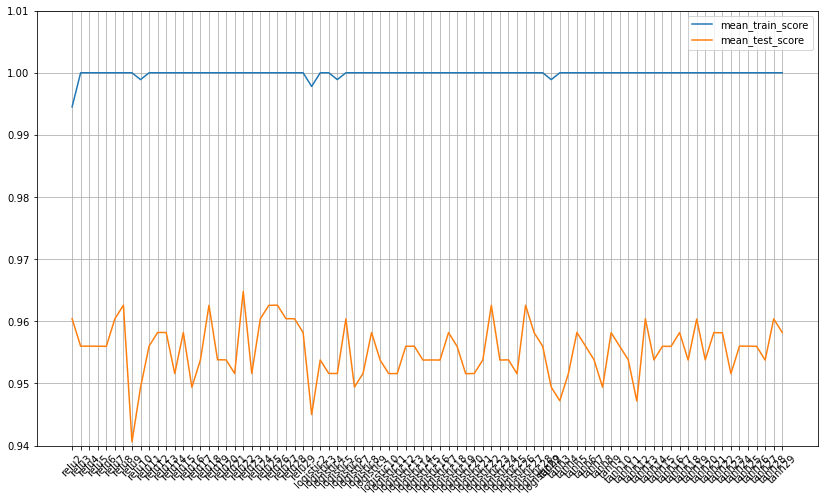

In [13]:
#plt.xticks(ticks = tickvalues ,labels = labellist, rotation = 'vertical')
tickvalues = result.index
plt.figure(figsize=(14, 8))
p1=plt.plot(result['mean_train_score'])
p2=plt.plot(result['mean_test_score'])
plt.legend((p1[0], p2[0]), ('mean_train_score', 'mean_test_score'), loc=1)
plt.xticks(ticks = tickvalues ,labels = result['xlabel'], rotation=45)
plt.ylim([0.94,1.01])
plt.grid();

In [14]:
grid_search.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': 22,
 'max_fun': 15000,
 'max_iter': 10000,
 'random_state': 42,
 'solver': 'lbfgs'}

In [15]:
best_model = grid_search.best_estimator_
best_model

MLPClassifier(hidden_layer_sizes=22, max_iter=10000, random_state=42,
              solver='lbfgs')

In [16]:
validation_score = grid_search.best_score_
print("validation score", validation_score)

validation score 0.9647960962007668


In [17]:
grid_search.score(X_train, y_train)

1.0

In [19]:
y_predict_train = best_model.predict(X_train)

In [20]:
#création de matrix de confusion
cm_train = confusion_matrix(y_train, y_predict_train)

In [21]:
cm_train

array([[169,   0],
       [  0, 286]], dtype=int64)

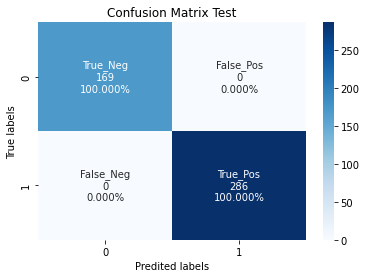

In [22]:
#pour RAJOUTER les labels et les pourcentages sur le graphique, passer par seaborn
#fig = plt.figure(figsize=(15, 7), dpi=100)
ax= plt.subplot()

group_names = ['True_Neg','False_Pos','False_Neg','True_Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm_train.flatten()]
group_percentages1 = ["{0:.3%}".format(value) for value in cm_train.flatten()[0:2]/np.sum(cm_train.flatten()[0:2])]
group_percentages2 = ["{0:.3%}".format(value) for value in cm_train.flatten()[2:]/np.sum(cm_train.flatten()[2:])]
group_percentages = np.append(group_percentages1, group_percentages2).tolist()
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip (group_names, group_counts, group_percentages)]
labels = np.array(labels).reshape(2,2)

sns.heatmap(cm_train, annot=labels, fmt='', cmap='Blues')

ax.set_xlabel('Predited labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix Test') 

plt.show()

### save the best model avec joblib

In [23]:
%%time
# 構築したモデルの保存
filename = 'model_MLPC.pkl'
joblib.dump(best_model,filename)

Wall time: 0 ns


['model_MLPC.pkl']

### modèle avec solver='sgd' pour Loss Curve

pour afficher loss curve (cross entropy), il faut solver='sgd'

notre model est solver='lbfgs', consigne de brief de Séb, donc j'ai créé un autre modèle avec solver='sgd' pour l'afficher

In [7]:
model_mlpc_relu_sgd = MLPClassifier(activation='relu',hidden_layer_sizes=(9), max_iter=10000, alpha= 0.0001,max_fun= 15000,random_state=42,
              solver='sgd')

In [10]:
model_mlpc_relu_sgd.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=9, max_iter=10000, random_state=42,
              solver='sgd')

In [11]:
%%time
# 構築したモデルの保存 modèle avec solver='sgd'
filename = 'model_MLPR_sgd.pkl'
joblib.dump(model_mlpc_relu_sgd,filename)

Wall time: 25.9 ms


['model_MLPR_sgd.pkl']

In [ ]:
"""GRID = [
    {'scaler': [StandardScaler()],
     'estimator': [MLPClassifier(random_state=RANDOM_SEED)],
     'estimator__solver': ['adam'],
     'estimator__learning_rate_init': [0.0001],
     'estimator__max_iter': [300],
     'estimator__hidden_layer_sizes': [(500, 400, 300, 200, 100), (400, 400, 400, 400, 400), (300, 300, 300, 300, 300), (200, 200, 200, 200, 200)],
     'estimator__activation': ['logistic', 'tanh', 'relu'],
     'estimator__alpha': [0.0001, 0.001, 0.005],
     'estimator__early_stopping': [True, False]
     }
]

PIPELINE = Pipeline([('scaler', None), ('estimator', MLPClassifier())])"""